This tutorial demonstrates efficient Gaussian process inference on data structured on a full grid, in the special case were **no data is missing**.
For the general case where there is data missing, see `gappy_grid_tutorial.ipynb`.

In [1]:
% matplotlib inline
import gp_grid
from gp_grid.misc import rastrigin, grid2mat, gapify_data
import matplotlib.pyplot as plt
import numpy as np

We will consider a two-dimensional synthetic dataset (the Rastrigin function) for visualization.

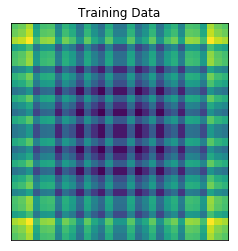

In [2]:
n = 30 # training points along each dimension
d = 2
N = n**d
# get the training set
xg = [np.linspace(0,1,num=n).reshape((-1,1)),]*d
x = grid2mat(*xg)
y = rastrigin((x*2-1)*5.12)
x = np.asarray(x).reshape((-1,d))
y = np.asarray(y).reshape((-1,1))
yg = y.reshape((n,)*d, order='F')

# get testing set
n_test = 500
xxg = [np.linspace(0,1,num=n_test).reshape((-1,1)),]*d
xx = grid2mat(*xxg)
yy = rastrigin((xx*2-1)*5.12, lin_term=1.)
xx = np.asarray(xx).reshape((-1,d))
yy = np.asarray(yy).reshape((-1,1))
yyg = yy.reshape((n_test,)*d, order='F')

# plot the training data
plt.imshow(yg,interpolation='none')
plt.title("Training Data")
plt.tick_params(which='both', bottom=False, top=False, left=False, right=False, 
                   labelbottom=False,labelleft=False)

We can now fit a model to this data set and predict at a higher resolution, in this way we can upscale the image above.
Because the data lies on a grid, GP inference can be performed extremely efficiently.

[ 15:24:21 ] gp_grid.models INFO: Function Evals: 51. Log-Marginal Likelihood: -2521.73.


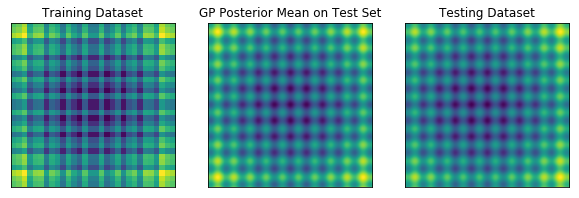

In [4]:
# get the gp_grid model
kern_list = [gp_grid.kern.RBF(1, lengthscale=0.05) for i in range(d)]
m = gp_grid.models.GPGridRegression(xg,yg,kern_list,noise_var=0.01)
m.optimize() # estimate the hyperparameters through log-marginal likelihood maximization

# predict on the test set
yyh = m.predict_grid(xxg)

# plot the training data, the model prediction, and the testing data
fig, ax = plt.subplots(ncols=3, figsize=(10,4))
ax[0].imshow(yg,interpolation='none')
ax[0].set_title("Training Dataset")
ax[1].imshow(yyh,interpolation='none')
ax[1].set_title("GP Posterior Mean on Test Set")
ax[2].imshow(yyg,interpolation='none')
ax[2].set_title("Testing Dataset")
for i in range(len(ax)): # remove ticks from figures to make pretty
    ax[i].tick_params(which='both', bottom=False, top=False, left=False, right=False, 
                       labelbottom=False,labelleft=False)

Evidently, upscaling to the test set has been done very accurately by the GP model.